In [57]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

## DECISION TREE

Empezamos con el estandarizado balanceado

In [58]:
df_esta_balan = pd.read_csv("../ficheros/04-Churm_balan_estan.csv", index_col=0)
df_esta_balan.head(2)

,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,1,1,0,-2.260159,-0.088299,1.378686,0.689342,0.447917,0,1,0,0,1,0
1,1,1,0,0.375385,-0.435342,-0.004426,0.829959,1.582440,1,0,0,0,1,0


In [59]:
# separamos los datos en X e y
X1 = df_esta_balan.drop("Exited", axis = 1)
y1 = df_esta_balan["Exited"]

In [60]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [61]:
# creamos el objeto del modelo
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

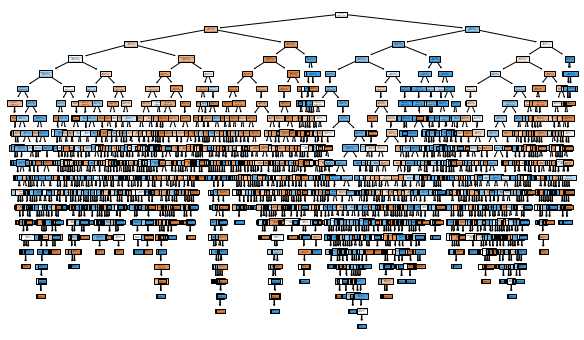

In [62]:
# Ploteamos la estructura del arbol
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show() # Como veis, no se aprecia nada en el arbol.

In [63]:
max_features = np.sqrt(len(x_train1.columns)) # Tenemos una profundidad de 4
max_features

3.605551275463989

In [64]:
# max depth

print(arbol.tree_.max_depth)

21


In [65]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta_balan = arbol.predict(x_test1)
y_pred_train_esta_balan = arbol.predict(x_train1)

In [66]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [67]:
# Sacamos las métricas
dt_results1 = metricas(y_test1, y_pred_test_esta_balan, y_train1, y_pred_train_esta_balan, "Decission Tree Esta Balan I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.819709,0.819529,0.831858,0.825648,0.639021,test,Decission Tree Esta Balan I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta Balan I


In [105]:
# Creamos un diccionario con los hiperparámetros
param = {"max_depth": [14, 16], 
        "max_features": [3,4], 
        "min_samples_split": [8, 20],
        "min_samples_leaf": [10,20]} 

In [106]:
# Iniciamos el modelo con GridSearch
gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), 
            param_grid= param, 
            cv=10,
            verbose=-1)

In [107]:
# ajustamos el modelo con el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [14, 16], 'max_features': [3, 4],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [8, 20]},
             verbose=-1)

In [108]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=16, max_features=3, min_samples_leaf=10,
                       min_samples_split=8, random_state=42)

In [109]:
y_pred_test_esta_balan2 = mejor_modelo.predict(x_test1)
y_pred_train_esta_balan2 = mejor_modelo.predict(x_train1)

In [110]:
dt_results2 = metricas(y_test1, y_pred_test_esta_balan2, y_train1,  y_pred_train_esta_balan2, "Decision tree Esta Balan II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.794278,0.809698,0.783186,0.796221,0.588635,test,Decision tree Esta Balan II
1,0.840641,0.852397,0.821404,0.836613,0.681192,train,Decision tree Esta Balan II


In [74]:
df_esta = pd.read_csv("../ficheros/02-Churm_estand_encod.csv", index_col=0)
df_esta.head(2)

,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1,1,1,-0.332983,0.490105,-1.041760,-1.225848,0.021886,1,0,0,1,0
1,1,0,1,0,-0.447572,0.374424,-1.387538,0.117350,0.216534,0,0,1,1,0


In [75]:
X2 = df_esta.drop("Exited", axis = 1)
y2 = df_esta["Exited"]

In [76]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [77]:
# creamos el objeto del modelo
arbol2 = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo
arbol2.fit(x_train2, y_train2)

DecisionTreeClassifier(random_state=0)

In [78]:
max_features2 = np.sqrt(len(x_train2.columns)) # Tenemos una profundidad de 4
max_features2

3.605551275463989

In [79]:
# max depth

print(arbol2.tree_.max_depth)

25


In [80]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol2.predict(x_test2)
y_pred_train_esta = arbol2.predict(x_train2)

In [81]:
# Sacamos las métricas
dt_results3 = metricas(y_test2, y_pred_test_esta, y_train2, y_pred_train_esta, "Decission Tree Esta I")
dt_results3

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.772,0.42623,0.463104,0.443902,0.300816,test,Decission Tree Esta I
1,1.000,1.00000,1.000000,1.000000,1.000000,train,Decission Tree Esta I


Da unos resultados malísimos

In [82]:
# Creamos un diccionario con los hiperparámetros
param2 = {"max_depth": [10,12, 14, 16, 18, 20], 
        "max_features": [1,2,3,4], 
        "min_samples_split": [10, 20, 50, 100],
        "min_samples_leaf": [10,20, 50, 100]} 

In [83]:
# Iniciamos el modelo con GridSearch
gs2 = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), 
            param_grid= param2, 
            cv=10,
            verbose=-1)

In [84]:
# ajustamos el modelo con el GridSearch

gs2.fit(x_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 12, 14, 16, 18, 20],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'min_samples_split': [10, 20, 50, 100]},
             verbose=-1)

In [85]:
mejor_modelo2 = gs2.best_estimator_
mejor_modelo2

DecisionTreeClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=100, random_state=42)

In [86]:
y_pred_test_esta2 = mejor_modelo.predict(x_test2)
y_pred_train_esta2 = mejor_modelo.predict(x_train2)

In [87]:
dt_results4 = metricas(y_test2, y_pred_test_esta2, y_train2,  y_pred_train_esta2, "Decision tree Estan II")
dt_results4

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.8150,0.521415,0.712468,0.602151,0.485367,test,Decision tree Estan II
1,0.8135,0.533628,0.733577,0.617828,0.498511,train,Decision tree Estan II


No nos gustan los resultados obtenidos

In [88]:
results_log = pd.read_csv("../ficheros/resultados_churn_reg_logis.csv", index_col= 0)

In [104]:
resultados_finales = pd.concat([results_log, dt_results1, dt_results2, dt_results3, dt_results4], axis= 0)
resultados_finales

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.828000,0.644970,0.277354,0.387900,0.305868,test,Regresión logistica Esta
1,0.820750,0.644628,0.284672,0.394937,0.307786,train,Regresión logistica Esta
0,0.752498,0.763751,0.749558,0.756588,0.504901,test,Regresión logistica Esta Balan
1,0.754884,0.759916,0.740453,0.750058,0.509665,train,Regresión logistica Esta Balan
0,0.819709,0.819529,0.831858,0.825648,0.639021,test,Decission Tree Esta Balan I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta Balan I
0,0.794278,0.809698,0.783186,0.796221,0.588635,test,Decision tree Esta Balan II
1,0.840641,0.852397,0.821404,0.836613,0.681192,train,Decision tree Esta Balan II
0,0.772000,0.426230,0.463104,0.443902,0.300816,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I


Nuestros mejores resultados, aunque no sean muy buenos, son los de regresión logística Estandarizados Balanceados II, ya que no hay mucha diferencia entre el kappa, es algo mayor de 0.5. No tenemos mucha diferencia entre recall y precision, aunque preferiríamos que todos los resultados fueran mejores

In [91]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,Age,0.350279
0,NumOfProducts,0.171732
6,Balance,0.100639
2,IsActiveMember,0.085016
7,EstimatedSalary,0.063546
5,Tenure,0.060649
3,CreditScore,0.054615
8,Geography_France,0.039089
12,Gender_Male,0.026561
9,Geography_Germany,0.019469


In [92]:
gender = importancia_predictores.iloc[[-5,-2]]
gender

,predictor,importancia
12,Gender_Male,0.026561
11,Gender_Female,0.007425


In [93]:
geography = importancia_predictores.iloc[[7,9,10]]
geography

,predictor,importancia
8,Geography_France,0.039089
9,Geography_Germany,0.019469
10,Geography_Spain,0.014722


In [94]:
importancia_predictores.drop(gender.index, inplace = True)
importancia_predictores.drop(geography.index, inplace = True)

In [95]:
importancia_predictores

,predictor,importancia
4,Age,0.350279
0,NumOfProducts,0.171732
6,Balance,0.100639
2,IsActiveMember,0.085016
7,EstimatedSalary,0.063546
5,Tenure,0.060649
3,CreditScore,0.054615
1,HasCrCard,0.006257


In [96]:
importancia_predictores.loc[8] =  ["gender", gender["importancia"].sum()]
importancia_predictores.loc[9] =  ["geography", geography["importancia"].sum()]

importancia_predictores.sort_values(by = "importancia", ascending = False, inplace = True)
importancia_predictores

,predictor,importancia
4,Age,0.350279
0,NumOfProducts,0.171732
6,Balance,0.100639
2,IsActiveMember,0.085016
9,geography,0.073279
7,EstimatedSalary,0.063546
5,Tenure,0.060649
3,CreditScore,0.054615
8,gender,0.033986
1,HasCrCard,0.006257


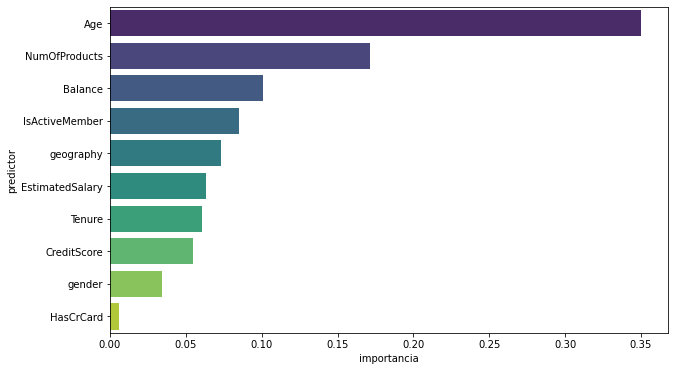

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()